<a href="https://colab.research.google.com/github/dartwinshu/rakamin-digital-festival-data-science/blob/main/Customer%20Loan_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Dartwin

# Import Libraries

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [107]:
# load dataset loan customer
df = pd.read_csv('loan_customer.csv')
# menampilkan informasi dataset
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
36,LP001109,1979-12-11,6.281302e+11,Male,Yes,0,Graduate,No,1828.0,1330.0,100000,360,30,0.0,NaN,house,REJECT
366,LP002175,1982-02-22,6.287735e+11,Male,Yes,0,Graduate,No,4750.0,2333.0,130000,360,30,1.0,NaN,house,APPROVE
32,LP001097,1990-11-03,6.281306e+10,Male,No,1,Graduate,Yes,4692.0,0.0,106000,360,30,1.0,NaN,studio,REJECT
91,LP001316,NaN,6.285256e+11,Male,Yes,0,Graduate,No,2958.0,2900.0,131000,360,30,1.0,NaN,apartment,APPROVE
410,LP002305,1985-07-16,6.287757e+10,Female,No,0,Graduate,No,4547.0,0.0,115000,360,30,1.0,NaN,apartment,APPROVE
18,LP001038,NaN,6.281122e+11,Male,Yes,0,Not Graduate,No,4887.0,0.0,133000,360,30,1.0,NaN,studio,REJECT
393,LP002250,1984-06-23,6.281372e+11,Male,Yes,0,Graduate,No,5488.0,0.0,125000,360,30,1.0,no,studio,APPROVE
468,LP002489,1980-02-05,6.285651e+10,Female,No,1,Not Graduate,NaN,5191.0,0.0,132000,360,30,1.0,NaN,apartment,APPROVE
349,LP002130,1988-11-24,6.285623e+11,Male,Yes,NaN,Not Graduate,No,3523.0,3230.0,152000,360,30,0.0,NaN,studio,REJECT
324,LP002053,NaN,6.285764e+11,Male,Yes,3+,Graduate,No,4342.0,189.0,124000,360,30,1.0,yes,apartment,APPROVE


# Data Cleansing

## Handling missing values

In [108]:
# sebelum drop baris dengan missing values
print("Kondisi sebelum drop baris dengan missing values:")
print(df.isna().sum())
# drop baris dengan missing values
df = df.dropna()
# sesudah drop baris dengan missing values
print("Kondisi sesudah drop baris dengan missing values:")
print(df.isna().sum())

Kondisi sebelum drop baris dengan missing values:
loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64
Kondisi sesudah drop baris dengan missing values:
loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64


## Handling duplicated data

In [109]:
# sebelum drop baris dengan duplicated values
print("Jumlah baris sebelum drop baris dengan duplicated values:")
print(df.duplicated().sum())
# drop baris dengan duplicated values
df=df.drop_duplicates()
# sesudah drop baris dengan duplicated values
print("Jumlah baris sesudah drop baris dengan duplicated values:")
print(df.duplicated().sum())

Jumlah baris sebelum drop baris dengan duplicated values:
0
Jumlah baris sesudah drop baris dengan duplicated values:
0


## Handling Outlier

In [110]:
print(f"Jumlah baris sebelum memfilter outlier:")
print(len(df))

for col in ["applicant_income", "coapplicant_income", "loan_amount", "loan_term_month", "loan_term_month"]:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - 1.5*IQR
  high_limit = Q3 + 1.5*IQR
  df = df[(df[col] >= low_limit) & (df[col] <= high_limit)]

print(f"Jumlah baris setelah memfilter outlier:")
print(len(df))

Jumlah baris sebelum memfilter outlier:
52
Jumlah baris setelah memfilter outlier:
39


## Feature Encoding

In [111]:
# lable encoding untuk kolom gender, married, education, has_credit_card, loan_status
mapping_gender = {
    "Female" : 0,
    "Male" : 1
}

mapping_married = {
    "No" : 0,
    "Yes" : 1
}

mapping_education = {
    "Not Graduate" : 0,
    "Graduate" : 1
}

mapping_has_credit_card = {
    "no" : 0,
    "yes" : 1
}

mapping_loan_status = {
    "REJECT" : 0,
    "APPROVE" : 1
}

df['gender'] = df['gender'].map(mapping_gender)
df['married'] = df['married'].map(mapping_married)
df['education'] = df['education'].map(mapping_education)
df['has_credit_card'] = df['has_credit_card'].map(mapping_has_credit_card)
df['loan_status'] = df['loan_status'].map(mapping_loan_status)

# one hot encoding untuk kolom property_type
onehot_property_type = pd.get_dummies(df["property_type"], prefix="property")
df = df.join(onehot_property_type)

# drop kolom outdated
df=df.drop(columns=["property_type"])

# menampilkan hasil encoded
df.sample(10)

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,loan_status,property_apartment,property_house,property_studio
362,LP002160,1990-11-27,6.281153e+11,1,1,3+,1,No,5167.0,3167.0,200000,360,30,1.0,1,1,1,0,0
26,LP001068,1986-09-10,6.281377e+11,1,1,0,1,No,2799.0,2253.0,122000,360,30,1.0,0,1,1,0,0
523,LP002683,1976-11-04,6.285745e+11,1,0,0,1,No,4683.0,1915.0,185000,360,30,1.0,0,0,1,0,0
31,LP001095,1983-09-21,6.281348e+11,1,0,0,1,No,3167.0,0.0,74000,360,30,1.0,1,0,0,1,0
206,LP001692,1991-02-21,6.285272e+11,0,0,0,0,No,4408.0,0.0,120000,360,30,1.0,0,1,1,0,0
81,LP001266,1984-08-05,6.285708e+11,1,1,1,1,Yes,2395.0,0.0,99000,360,30,1.0,0,1,1,0,0
585,LP002892,1983-06-24,6.285638e+11,1,1,2,1,No,6540.0,0.0,205000,360,30,1.0,0,1,1,0,0
93,LP001319,1985-04-18,6.281135e+11,1,1,2,0,No,3273.0,1820.0,81000,360,30,1.0,0,1,0,1,0
257,LP001849,1989-06-13,6.285719e+11,1,0,0,0,No,6045.0,0.0,115000,360,30,0.0,1,0,0,0,1
244,LP001807,1995-10-08,6.285629e+11,1,1,2,1,Yes,6250.0,1300.0,108000,360,30,1.0,0,1,0,0,1


# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti

gender
0     8
1    31
Name: loan_id, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


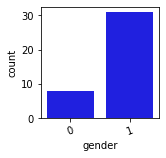

In [131]:
# Buat tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti
# 0 = Female dan 1 = Male
print(df.groupby("gender")["loan_id"].count())

# Buat visualisasi untuk data pada tahap sebelumnya
# 0 = Female dan 1 = Male
plt.subplot(2, 3, 1)
sns.countplot(df["gender"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()

# Tulis interpretasi
# - Mayoritas dari nasabah bank yang mengajukan pinjaman membeli properti berjenis kelamin laki-laki
# - Perbandingan antara jenis kelamin nasabah bank yang mengajukan pinjaman membeli properti adalah sekitar 4:1 (Laki-laki:Perempuan)

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam 

loan_term_year  married
30              0          16
                1          23
Name: loan_id, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


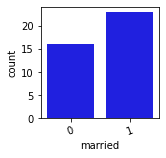

In [130]:
#Buat tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun)
# 0 = tidak menikah dan 1 = menikah
print(df.groupby(["loan_term_year", "married"])["loan_id"].count())

#Buat visualisasi untuk data pada tahap sebelumnya
# 0 = tidak menikah dan 1 = menikah
plt.subplot(2, 3, 1)
sns.countplot(df["married"], color="blue", orient="v")
plt.xticks(rotation=20)
plt.tight_layout()


#Tulis interpretasi
# - Dataset yang setelah di-cleansing hanya tersisa data-data loan term year 3 tahun
# - Sehingga tidak dapat menjelaskan apa pengaruh banyaknya nasabah bank yang mengajukan pinjaman membeli properti dengan loan term
# - Namun, dapat diketahui pengaruh pernikahan terhadap banyaknya nasabah bank yang mengajukan pinjaman membeli properti
# - Perbandingan antara status pernikahan nasabah bank yang mengajukan pinjaman membeli properti adalah sekitar 3:2 (Nikah:Tidak Nikah)